In [1]:
import numpy as np
import pandas as pd
import pickle
import scipy
from statannotations.Annotator import Annotator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb

In [2]:
K = 100
trial_len = 26
vmean_all_rep = np.load('../FILES/vmean_all_rep_RNN_5.npy')
trials_all_rep = np.load('../FILES/trials_all_rep_RNN_5.npy')

In [3]:
each_avg = 25

all_corr_runs = []
for rep in range(len(trials_all_rep)):
    print(rep)
    trials = trials_all_rep[rep]
    num_trials = len(trials)
    vmean = np.array(vmean_all_rep[rep])
    vmean0 = np.zeros((K,trial_len, np.sum(trials==0)))
    vmean1 = np.zeros((K,trial_len, np.sum(trials==1)))
    count0 = 0
    count1 = 0

    for counter in range(0, 1700):##len(trials)):
        ##print(counter)
        trial = trials[counter]
        if trial ==0:
            vmean0[:, :, count0] = vmean[counter*trial_len:(1+counter)*trial_len,:].T
            count0 = count0 +1
        else:
            vmean1[:, :, count0] = vmean[counter*trial_len:(1+counter)*trial_len,:].T
            count1 = count1 + 1
        if counter >0:
            vmean_comb = np.dstack((vmean_comb, vmean[counter*trial_len:(1+counter)*trial_len,:].T))
        else:
            vmean_comb = vmean[counter*trial_len:(1+counter)*trial_len,:].T

    
    rep_times = int(np.floor(np.minimum(np.shape(vmean1)[2], np.shape(vmean0)[2])/each_avg))
    
    for avging in range(0, rep_times):
        corrplot01 = np.zeros((trial_len, trial_len))
        for i in range(trial_len):
            for j in range(trial_len):
                zeroi = np.nan_to_num(np.mean(vmean0[:,i,avging*each_avg:(1+avging)*each_avg], axis = 1))
                onej = np.nan_to_num(np.mean(vmean1[:,j,avging*each_avg:(1+avging)*each_avg], axis = 1))
                
                corrplot01[i,j] = scipy.stats.pearsonr(zeroi, onej)[0]
        ##sb.heatmap(corrplot01)
        ##plt.show()
        if avging == 0:
            corr_each = corrplot01
        else:
            corr_each = np.dstack((corr_each, corrplot01))
    all_corr_runs.append(corr_each)

0


/Users/natrajanm/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


1
2
3
4
5
6
7
8
9


In [5]:
# Define the regions of interest
regions = [[0, 6], [10, 13], [15, 18], [20, 23]]

other_regions = np.array([10,13,14,15,18,19,20,23])
correlation_matrix_1 = np.zeros((trial_len, trial_len))
for i, region_i in enumerate(regions):
    for j, region_j in enumerate(regions):
        if i !=j:
            for k in range(region_i[0], region_i[1]):
                for l in range(region_j[0], region_j[1]):
                    correlation_matrix_1[k, l] = 1

correlation_matrix_2 = np.zeros_like(correlation_matrix_1)
for i in range(16,19):
    for j in range(16,19):
        correlation_matrix_2[i, j] = 1


correlation_matrix_3 = np.zeros_like(correlation_matrix_1)
for i in range(11,14):
    for j in range(11,14):
        correlation_matrix_3[i, j] = 1


correlation_matrix_4 = np.zeros_like(correlation_matrix_1)
for i in range(0,6):
    for j in range(0,6):
        correlation_matrix_4[i, j] = 1
        
correlation_matrix_5 = np.zeros_like(correlation_matrix_1)
for i in range(6,10):
    for j in range(6,10):
        correlation_matrix_5[i, j] = 1
        
correlation_matrix_6 = np.zeros_like(correlation_matrix_1)
for i in range(20,23):
    for j in range(20,23):
        correlation_matrix_6[i, j] = 1
        


In [8]:

correlation_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3]
correlation_matrices_2 = [correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]

labels_1 = ['Off Diag','Post R1', 'Post Ind']
labels_2 = ['off diag1','off diag2', 'off diag3', 'off diag4', 'off diag 5', 'off diag 6']

##all_masks_matrix = np.full((9,trial_len,100), np.nan)
all_masks_matrix = np.full((6,20,100), np.nan)
countx = 0
count = 0

for session_n in range(10):
    if count>3:
        countx = countx + 1
        count = 0
        
    corr_position_day = all_corr_runs[session_n]


    for i, mask in enumerate(correlation_matrices_1):
        mask_array = np.zeros((corr_position_day.shape[2], corr_position_day.shape[0], corr_position_day.shape[1]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(corr_position_day.T, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        all_masks_matrix[i,session_n,0:len(mean_values_array)] = mean_values_array


    for i, mask in enumerate(correlation_matrices_2):
        mask_array = np.zeros((corr_position_day.shape[2], corr_position_day.shape[0], corr_position_day.shape[1]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(corr_position_day.T, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        
        all_masks_matrix[i+3,session_n,0:len(mean_values_array)] = mean_values_array

    count = count + 1
    

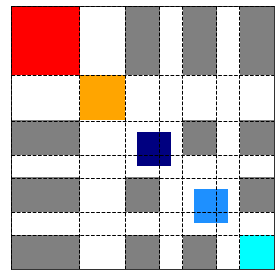

In [9]:
correlation_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3,correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]

colors = ['white', 'gray', 'dodgerblue','navy','red','orange','cyan']
all_correlation_matrix = np.zeros_like(correlation_matrix_1)
for i in range(len(correlation_matrices_1)):
    all_correlation_matrix[correlation_matrices_1[i]== 1] = i+1
custom_cmap = ListedColormap(colors)
plt.imshow(all_correlation_matrix[0:23,0:23], cmap = custom_cmap, rasterized = True) 
for i, region in enumerate(regions):
    plt.axvline(x=region[0]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axvline(x=region[1]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axhline(y=region[0]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axhline(y=region[1]-0.5, color='black', linewidth=1, linestyle='--')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

In [10]:
norm_time = []
for rep in range(0, 20):
    crossed1 = np.where(all_masks_matrix[1,rep,:]<0.1)[0]
    crossed2 = np.where(all_masks_matrix[2,rep,:]<0.1)[0]
    if len(crossed1)>0 and len(crossed2)>0:
        end_time = np.maximum(crossed1[0], crossed2[0])+2
        interp_mul = []
        for loc in range(0,6):
            mask_norm = all_masks_matrix[loc,rep,0:end_time].T
            interp = np.interp(np.arange(0,50,1),  np.linspace(0,50,end_time),mask_norm)
            interp_mul.append(interp)
        
        if len(norm_time) == 0:
            interp_all = np.array(interp_mul)
        else:
            interp_all = np.dstack((interp_all, np.array(interp_mul)))
            
        norm_time.append(end_time)

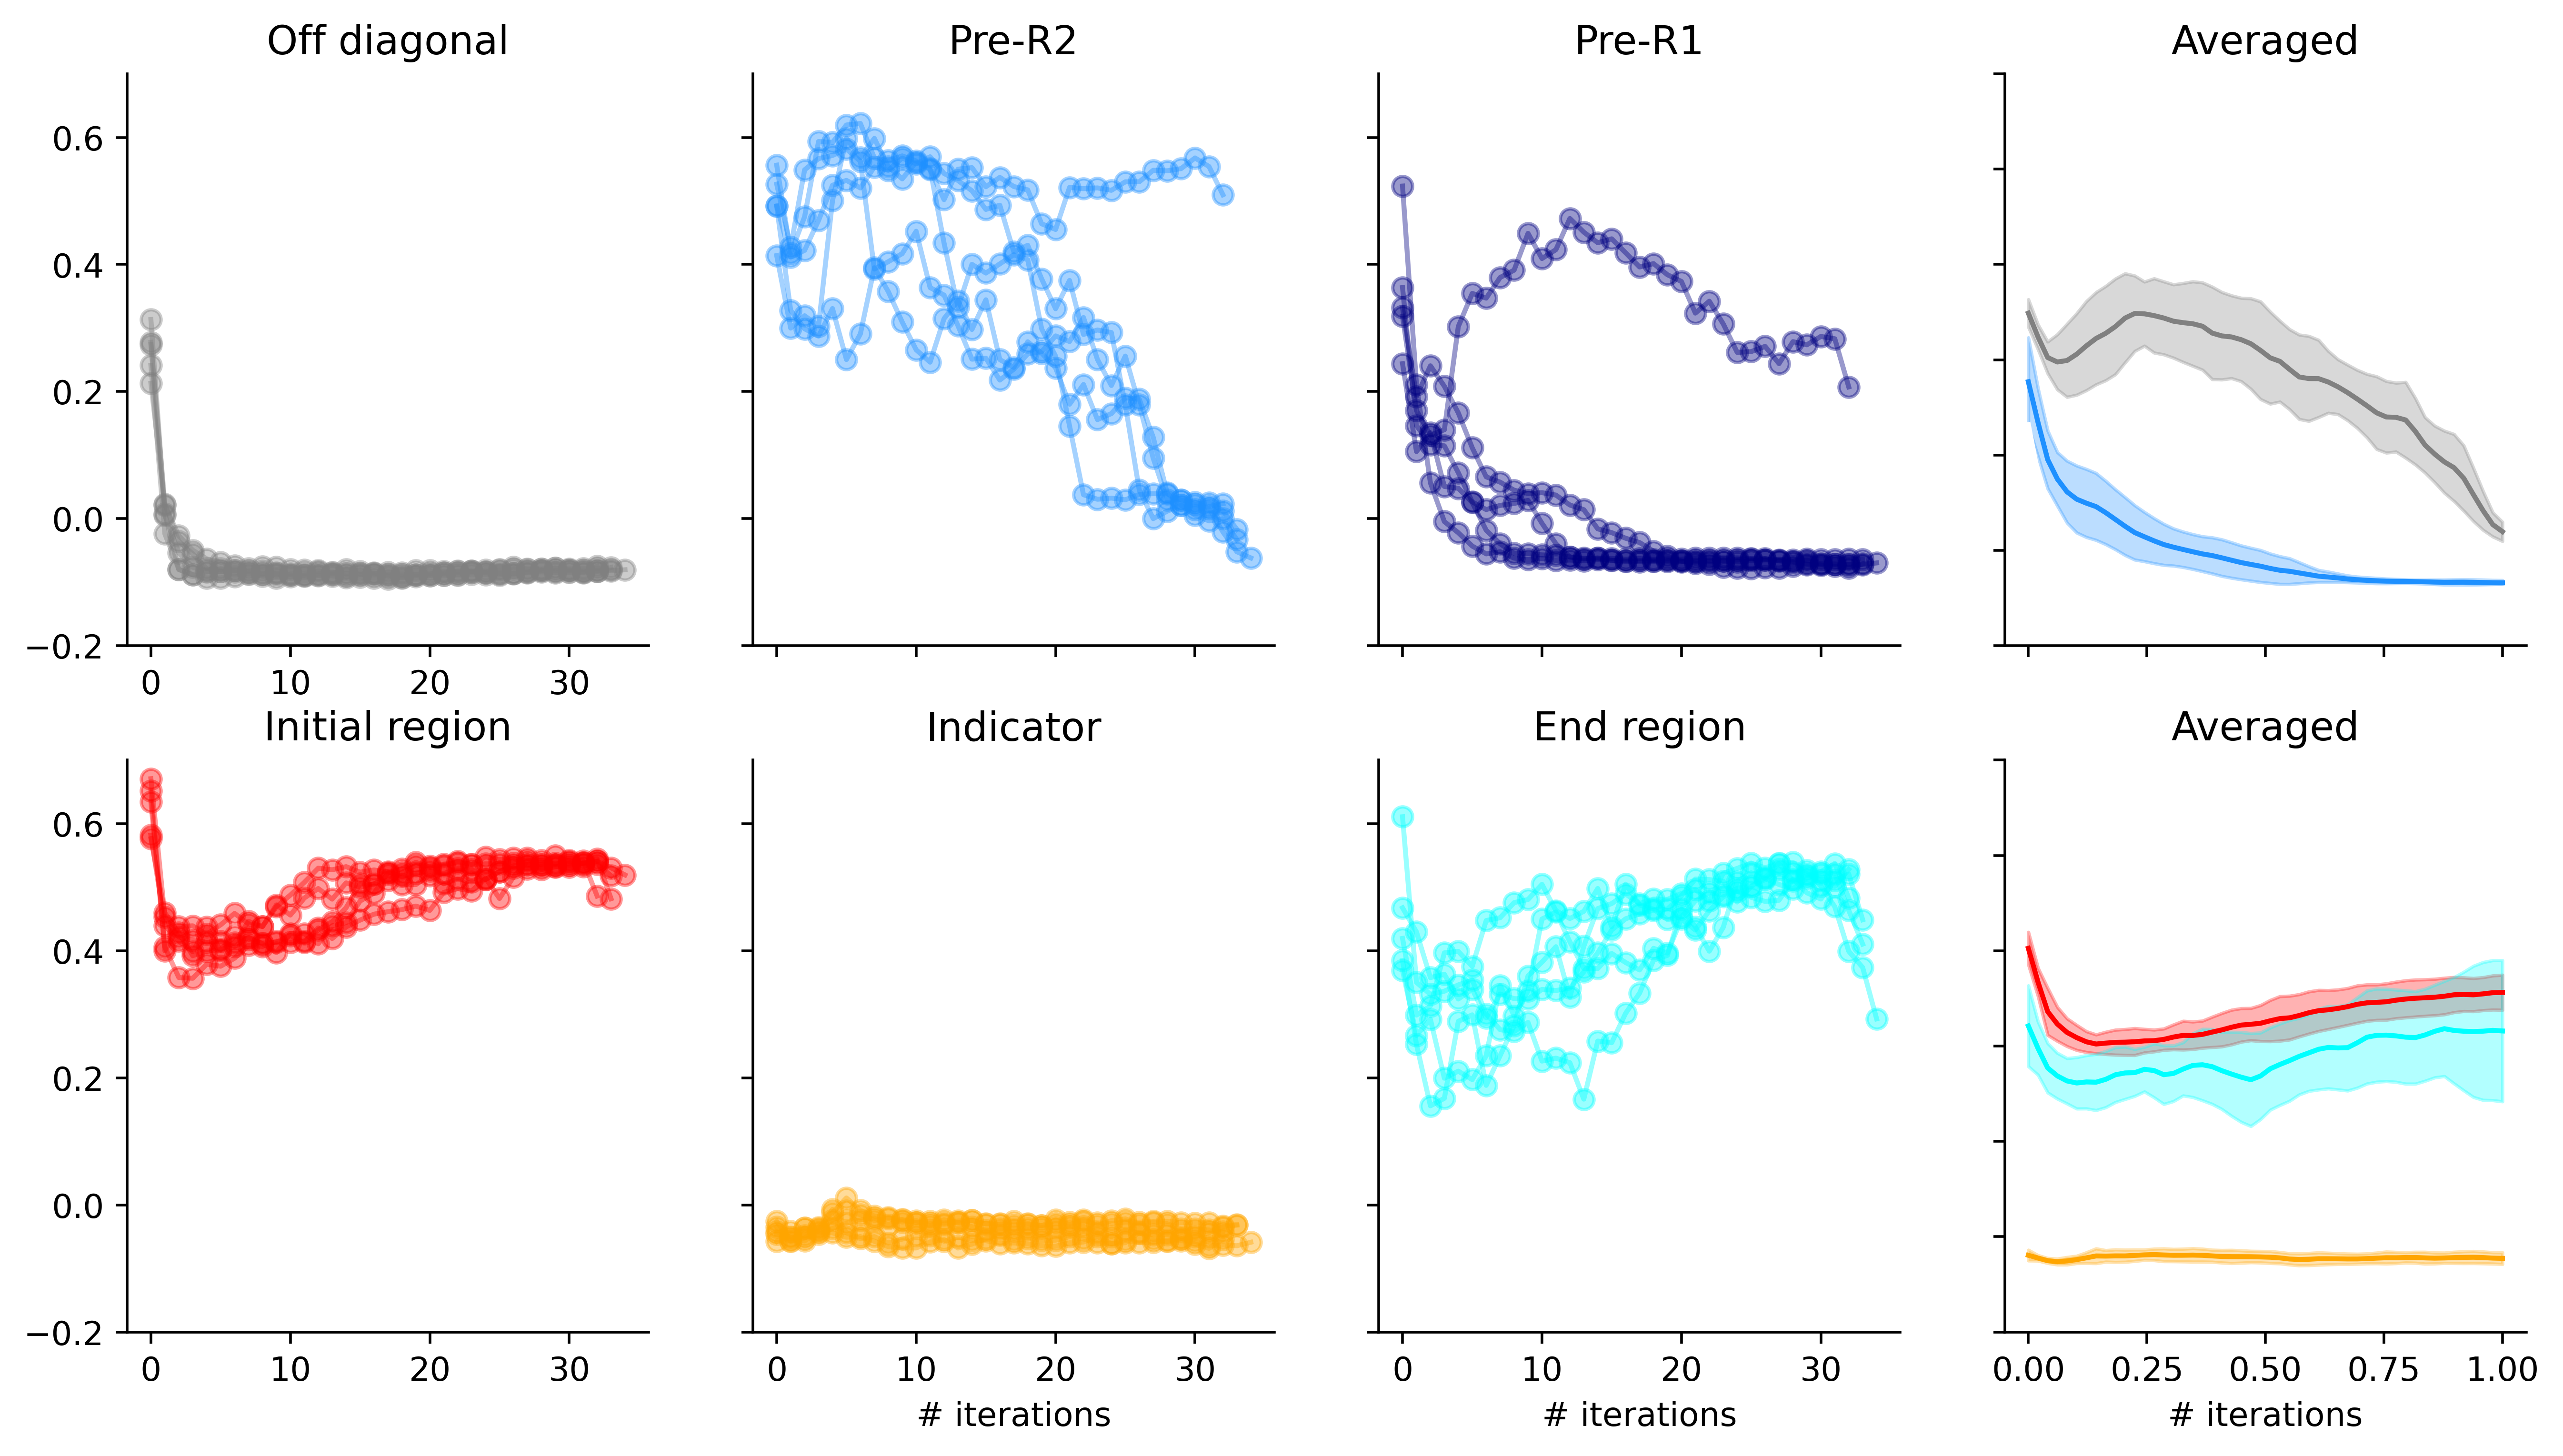

In [11]:
colors = ['gray', 'dodgerblue','navy','red','orange','cyan']
labels_1 = ['Off diagonal','Pre-R2', 'Pre-R1', 'Initial region','Indicator','End region']
all_masks_matrix_new = all_masks_matrix[:,0:,:]
crossed_postr1 = (all_masks_matrix_new[1][:,-1])<0.1
crossed_prer1 = (all_masks_matrix_new[2][:,-1])<0.1
plot_reps = crossed_postr1*crossed_prer1
figx = 0
figy = 0
fig1, axs1 = plt.subplots(nrows=2, ncols=4, figsize=(13, 7), dpi=500)
for i, mask in enumerate(correlation_matrices_1):
    if figy>2:
        figx = figx+1
        figy = 0
    for rep in range(0, 5):
        
        axs1[figx, figy].plot(all_masks_matrix[i,rep,:],'-o', color = colors[i], alpha = 0.4)
    axs1[figx, figy].set_ylim(-0.2,0.7)
    axs1[figx, figy].spines['top'].set_visible(False)
    axs1[figx, figy].spines['right'].set_visible(False) 
    axs1[figx,figy].set_title(labels_1[i])
    figy = figy+1
    
    if figx==0:
        axs1[figx, figy].set_xticklabels([])
    else:
        axs1[figx, figy].set_xlabel('# iterations')
    if figy>0:
        axs1[figx, figy].set_yticklabels([])


for i in range(0,3):
    means_plot = np.mean(interp_all[i], axis = 1)
    std_plot = np.std(interp_all[i], axis = 1)
    axs1[0,3].plot(np.linspace(0,1,50), means_plot, color=colors_1[i])
    axs1[0,3].fill_between(np.linspace(0,1,50),means_plot-std_plot, means_plot+std_plot ,alpha=0.3, color=colors_1[i])
axs1[0,3].set_ylim([-0.2, 1])
axs1[0,3].spines['top'].set_visible(False)
axs1[0,3].spines['right'].set_visible(False)
axs1[0,3].set_title('Averaged')


for i in range(3,6):
    means_plot = np.mean(interp_all[i], axis = 1)
    std_plot = np.std(interp_all[i], axis = 1)
    axs1[1,3].plot(np.linspace(0,1,50), means_plot, color=colors[i])
    axs1[1,3].fill_between(np.linspace(0,1,50),means_plot-std_plot, means_plot+std_plot ,alpha=0.3, color=colors[i])
axs1[1,3].set_ylim([-0.2, 1])
axs1[1,3].spines['top'].set_visible(False)
axs1[1,3].spines['right'].set_visible(False)
axs1[1,3].set_title('Averaged')
